<font size=5>RADIN IME NURHAKIM BIN RADIN YUSOFF</font>

<font size=5>AAI PROJECT EXAM</font>

<font size=5>Project A: Time Series Forecasting using ARIMA, SARIMA and Prophet </font>

In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
np.random.seed(1)

#Load the monthly temperature from CSV
df = pd.read_csv('monthly-mean-temp.csv')

# Convert the 'Month' column to a datetime type for better plotting
df['Month'] = pd.to_datetime(df['Month'])

#Review loaded data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        240 non-null    datetime64[ns]
 1   Temperature  240 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


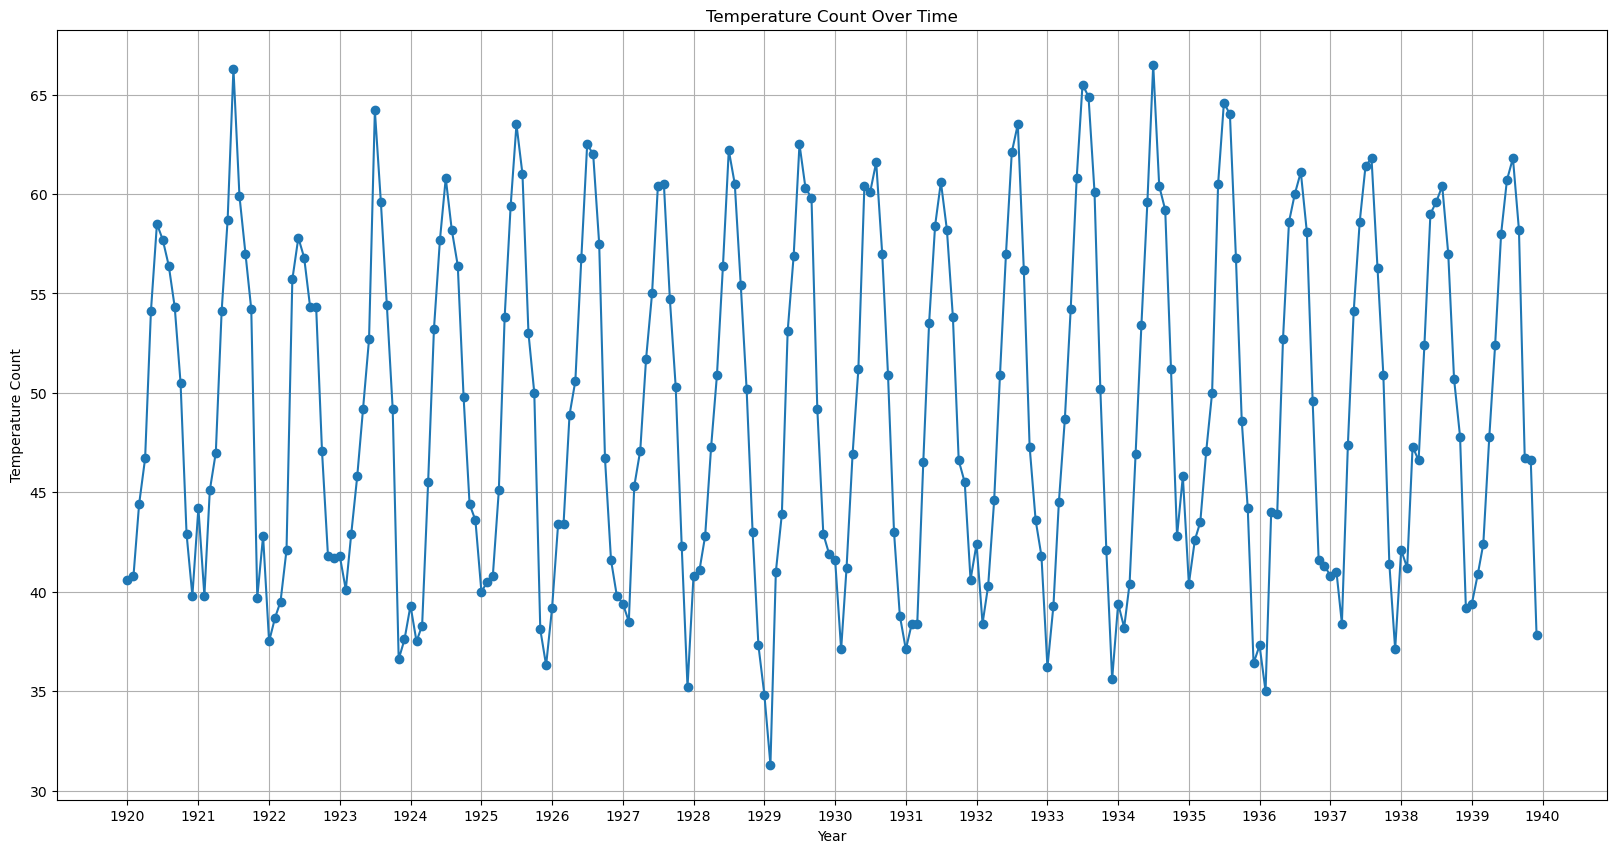

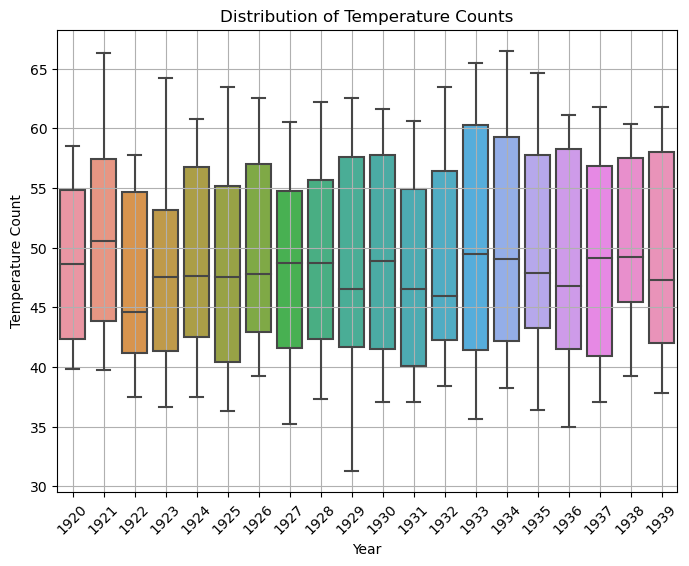

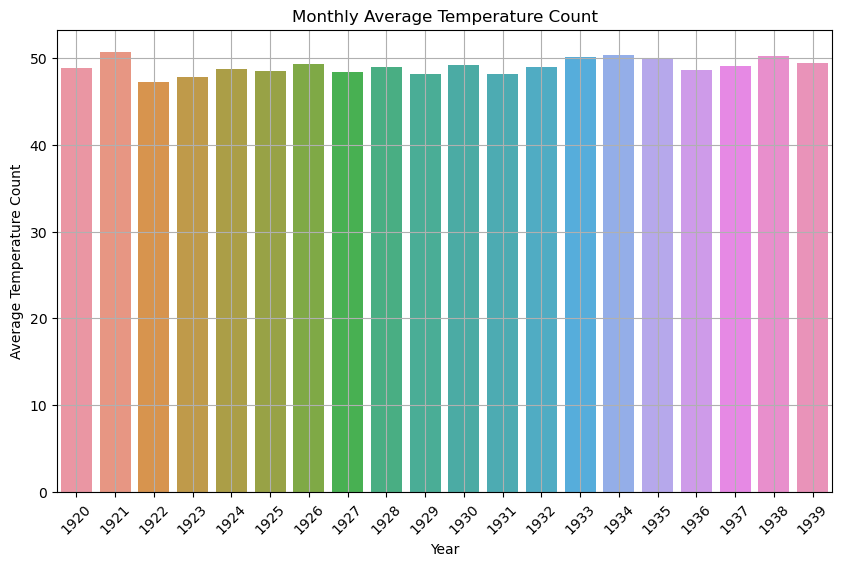

In [3]:
# Exploratory Data Analysis (EDA)

# Line plot Temperature count over time
plt.figure(figsize=(20, 10))
plt.plot(df['Month'], df['Temperature'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature Count')
plt.title('Temperature Count Over Time')

# Set the locator for x-axis ticks to display years only once
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

plt.grid(True)
plt.show()

# Box plot to visualize the distribution of Temperature counts
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=df['Month'].dt.strftime('%Y'), y='Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature Count')
plt.title('Distribution of Temperature Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Monthly average Temperature count
df['Year'] = df['Month'].dt.strftime('%Y')
monthly_avg = df.groupby('Year')['Temperature'].mean().reset_index()

# Bar plot for monthly average Temperature count
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg, x='Year', y='Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature Count')
plt.title('Monthly Average Temperature Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


From the datasets, we can see that the given datasets:

1. Quite consistent as the temperature count over time showing that there was no sudden spike in the datasets.

2. From the boxplot graph, it is showed that the median of the temperature count for monthly data is in small difference range from each other, even each 25% percentile of each bar showing small difference of range.

3. When plot this into histogram, we can see that the average temperature is almost the same.

So, from this analysis, we can conclude that this dataset is suitable for the timeseries analysis. In this study, we will use ARIMA, SARIMA and PROPHET to conduct timeseries analysis. After this study, we can see which out of this three models are the best to predict the timeseries from this datasets.

<font size=4>TIME SERIES : ARIMA MODEL </font>

In [4]:
#Import the library
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [5]:
# Load the dataset
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
# Split the dataset into train and test sets
X = df['Temperature'].values
X = X.astype('float32')
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

In [6]:
# Create ARIMA model
modelAR = ARIMA(train, order=(5,1,0))
modelAR_fit = modelAR.fit()

# Make predictions for ARIMA
predictions_AR = modelAR_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [7]:
# Evaluate predictions
# Calculate the MSE
mse_AR = mean_squared_error(test, predictions_AR)
print('ARIMA Test MSE: %.3f' % mse_AR)
# Calculate RMSE
rmse_AR = sqrt(mean_squared_error(test, predictions_AR))
print('ARIMA Test RMSE: %.3f' % rmse_AR)
# Calculate MAPE
mape_AR = mean_absolute_percentage_error(test, predictions_AR)
print('ARIMA Test Score MAPE: %.5f' % mape_AR)

ARIMA Test MSE: 56.193
ARIMA Test RMSE: 7.496
ARIMA Test Score MAPE: 0.12090


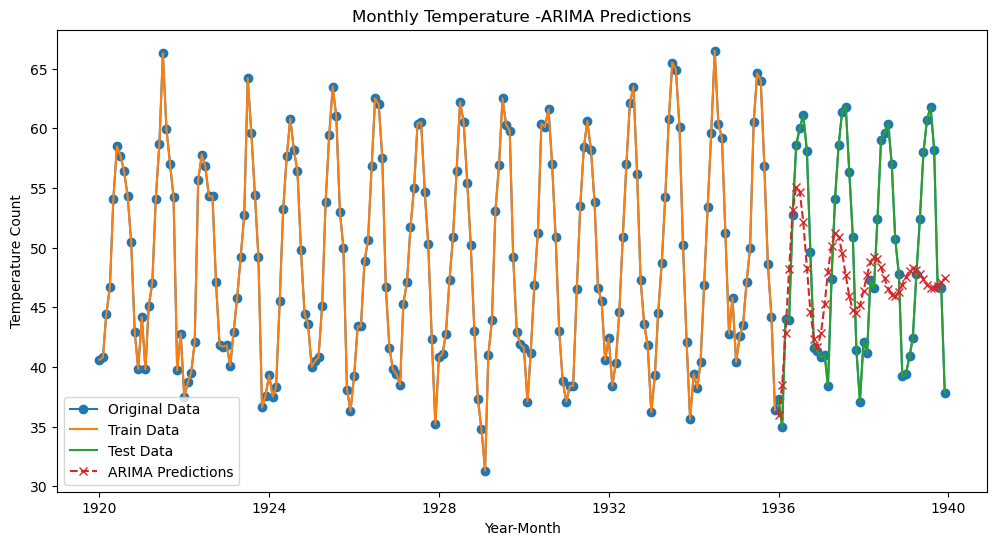

In [8]:
## Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], label='Original Data', marker='o')
plt.plot(df.index[:size], train, label='Train Data')
plt.plot(df.index[size:], test, label='Test Data')
plt.plot(df.index[size:], predictions_AR, label='ARIMA Predictions', linestyle='dashed', marker='x')
plt.xlabel('Year-Month')
plt.ylabel('Temperature Count')
plt.title('Monthly Temperature -ARIMA Predictions')
plt.legend()
plt.show()

<font size=4>TIME SERIES : SARIMA MODEL </font>

In [9]:
# Preparing library for SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
# Function for SARIMA grid search
def sarima_grid_search(train):
    p = d = q = range(0, 2)
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    best_aic = float('inf')
    best_params = None
    
    for param in seasonal_pdq:
        try:
            model = SARIMAX(train, order=(5, 1, 0), seasonal_order=param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
        except:
                continue
        
    return best_params

In [10]:
# Find the best SARIMA parameters
best_params = sarima_grid_search(train)
print('Best SARIMA parameters: ', best_params)

# Fit the SARIMA model with the best parameters
modelSAR = SARIMAX(train, order=(5, 1, 0), seasonal_order=best_params)
modelSAR_fit = modelSAR.fit()

# Make predictions
#trainPredict = modelSAR_fit.predict(start=0, end=size-1)
predictions_SAR = modelSAR_fit.predict(start=size, end=len(df)-1)

Best SARIMA parameters:  (1, 1, 1, 12)


In [11]:
# Evaluate predictions
# Calculate MSE
mse_SAR = mean_squared_error(test, predictions_SAR)
print('SARIMA Test MSE: %.3f' % mse_SAR)

# Calculate RMSE (root mean squared error)
rmse_SAR = sqrt(mean_squared_error(test, predictions_SAR))
print('SARIMA Test Score RMSE: %.2f' % rmse_SAR)

# Calculate MAPE
mape_SAR = mean_absolute_percentage_error(test, predictions_SAR)
print('SARIMA Test Score MAPE: %.5f' % mape_SAR)

SARIMA Test MSE: 4.732
SARIMA Test Score RMSE: 2.18
SARIMA Test Score MAPE: 0.03551


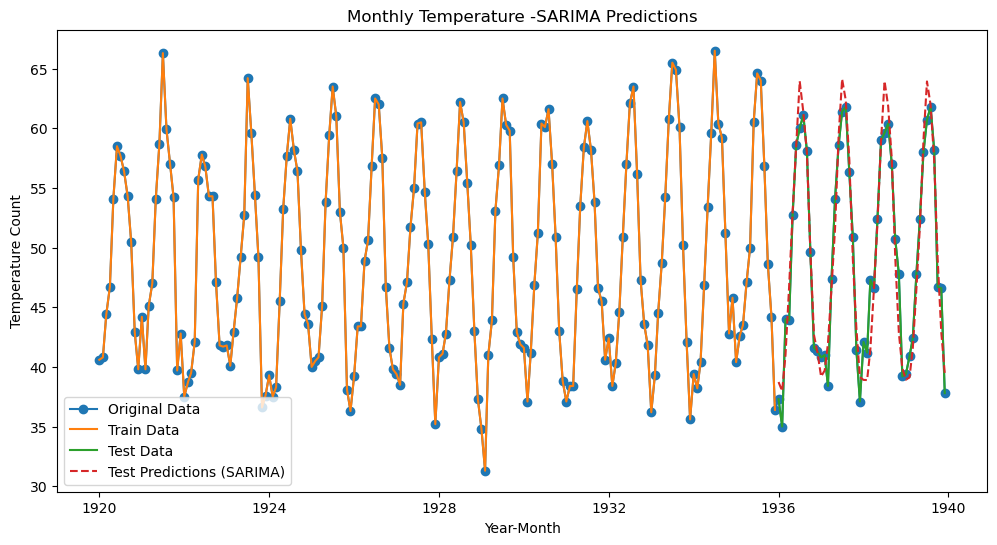

In [12]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], label='Original Data', marker='o')
plt.plot(df.index[:size], train, label='Train Data')
plt.plot(df.index[size:], test, label='Test Data')
plt.plot(df.index[size:], predictions_SAR, label='Test Predictions (SARIMA)', linestyle='dashed')
plt.xlabel('Year-Month')
plt.ylabel('Temperature Count')
plt.title('Monthly Temperature -SARIMA Predictions')
plt.legend()
plt.show()

<font size=4>TIME SERIES : PROPHET MODEL </font>

In [13]:
# Import library for Prophet model
from sklearn.model_selection import GridSearchCV
from prophet import Prophet
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Load the dataset (for the prophet model)
df = pd.read_csv('monthly-mean-temp.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [15]:
# Create Prophet model
prophet_train = pd.DataFrame({'ds': train.index, 'y': train.values.ravel()})
prophet_test = pd.DataFrame({'ds': test.index})

# Fit the Prophet model into datasets
m = Prophet()
m.fit(prophet_train)
forecast = m.predict(prophet_test)

11:50:03 - cmdstanpy - INFO - Chain [1] start processing
11:50:03 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Make predictions
train_predict_prophet = m.predict(prophet_train)
test_predict_prophet = forecast['yhat'].values

In [17]:
# Evaluate predictions
# Calculate MSE
mse_Prop = mean_squared_error(test, test_predict_prophet)
print('PROPHET Test MSE: %.3f' % mse_Prop)

# Calculate RMSE (root mean squared error)
rmse_Prop = sqrt(mean_squared_error(test, test_predict_prophet))
print('PROPHET Test Score RMSE: %.2f' % rmse_Prop)

# Calculate MAPE
mape_Prop = mean_absolute_percentage_error(test, test_predict_prophet)
print('PROPHET Test Score MAPE: %.5f' % mape_Prop)

PROPHET Test MSE: 6.622
PROPHET Test Score RMSE: 2.57
PROPHET Test Score MAPE: 0.04442


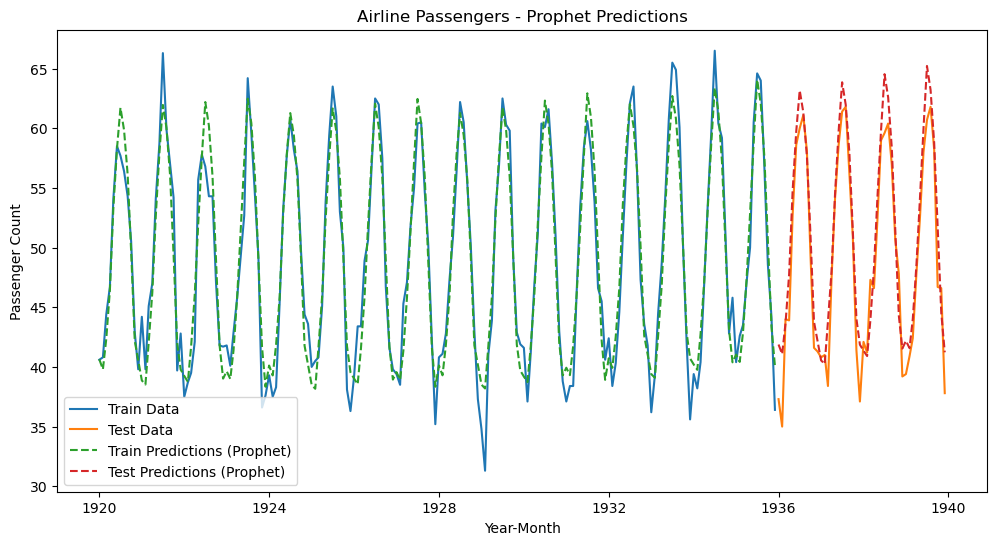

In [18]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train, label='Train Data')
plt.plot(df.index[train_size:], test, label='Test Data')
plt.plot(prophet_train['ds'], train_predict_prophet['yhat'], label='Train Predictions (Prophet)',
linestyle='dashed')
plt.plot(prophet_test['ds'], test_predict_prophet, label='Test Predictions (Prophet)',
linestyle='dashed')
plt.xlabel('Year-Month')
plt.ylabel('Passenger Count')
plt.title('Airline Passengers - Prophet Predictions')
plt.legend()
plt.show()

<font size=4>RESULTS AND DISCUSSION </font>

In [19]:
# ARIMA prediction test result
print('ARIMA Test MSE: %.3f' % mse_AR)
print('ARIMA Test RMSE: %.3f' % rmse_AR)
print('ARIMA Test Score MAPE: %.5f' % mape_AR)

#SARIMA prediction test result
print('SARIMA Test MSE: %.3f' % mse_SAR)
print('SARIMA Test Score RMSE: %.2f' % rmse_SAR)
print('SARIMA Test Score MAPE: %.5f' % mape_SAR)

#PROPHET prediction test result
print('PROPHET Test MSE: %.3f' % mse_Prop)
print('PROPHET Test Score RMSE: %.2f' % rmse_Prop)
print('PROPHET Test Score MAPE: %.5f' % mape_Prop)

ARIMA Test MSE: 56.193
ARIMA Test RMSE: 7.496
ARIMA Test Score MAPE: 0.12090
SARIMA Test MSE: 4.732
SARIMA Test Score RMSE: 2.18
SARIMA Test Score MAPE: 0.03551
PROPHET Test MSE: 6.622
PROPHET Test Score RMSE: 2.57
PROPHET Test Score MAPE: 0.04442


From the RMSE and MAPE results of three techniques, we can conclude that:

1. ARIMA is the worst predictor for this dataset as its RMSE and MAPE are the largest value among others.

2. SARIMA is the best predictor for this dataset as its RMSE and MAPE value are the smallet values.

3. PROPHET is the alternate predictor to SARIMA as its RMSE and MAPE value are compatible to the SARIMA.

4. Please refer below graph to see how the test data predict plotted using three techniques:

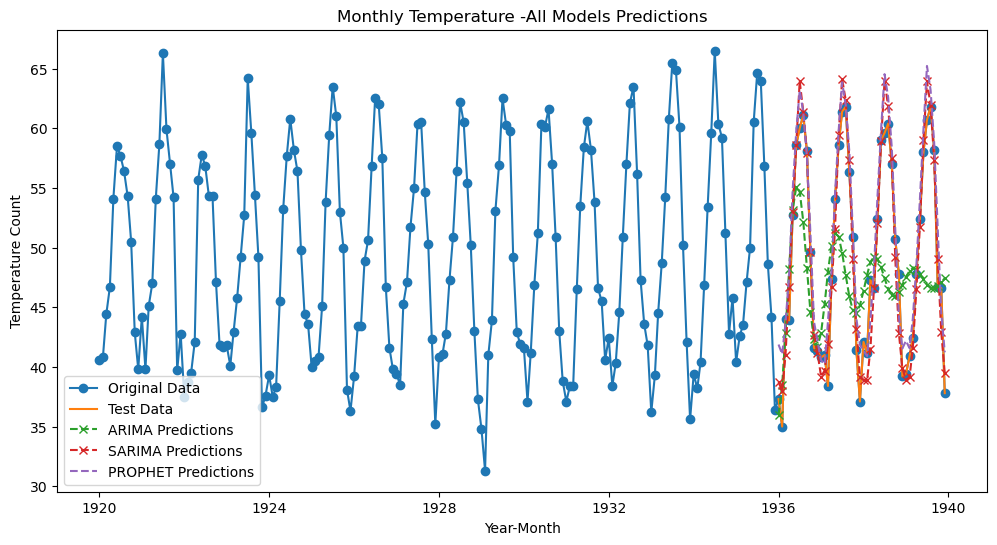

In [20]:
# Visualize the predictions after using ARIMA,SARIMA and PROPHET models
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], label='Original Data', marker='o')
plt.plot(df.index[size:], test, label='Test Data')
plt.plot(df.index[size:], predictions_AR, label='ARIMA Predictions', linestyle='dashed', marker='x')
plt.plot(df.index[size:], predictions_SAR, label='SARIMA Predictions', linestyle='dashed', marker='x')
plt.plot(prophet_test['ds'], test_predict_prophet, label='PROPHET Predictions', linestyle='dashed')
plt.xlabel('Year-Month')
plt.ylabel('Temperature Count')
plt.title('Monthly Temperature -All Models Predictions')
plt.legend()
plt.show()

<font size=5>Project B: Sentiment Analysis using ANN architecture</font>

<font size=4>Part A: Perform Text Processing </font>

In [21]:
# Import library
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [22]:
# Load CSV file
ds = pd.read_csv('sentiment_analysis.csv')

# Viewing the datasets with maximum column width
pd.set_option('display.max_colwidth', None)
ds.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [23]:
# To view the columns name. This is for the next action to drop the unnescary columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Text              96 non-null     object 
 1   Sentiment         96 non-null     object 
 2   Source            96 non-null     object 
 3   Date/Time         96 non-null     object 
 4   User ID           96 non-null     object 
 5   Location          96 non-null     object 
 6   Confidence Score  96 non-null     float64
dtypes: float64(1), object(6)
memory usage: 5.4+ KB


In [24]:
# Dropping others columns, columns interest are only the 'Text' and 'Sentiment' column only.
ds = ds.drop(columns=['Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score'])

In [25]:
# To see the datasets after dropping others columns
ds.sample(5)

,Text,Sentiment
7,Their website is so user-friendly. Love it!,Positive
73,The customer service at this store is outstanding. They truly care about their customers.,Positive
65,The product I ordered never arrived. Poor customer service.,Negative
23,The product I received was damaged. Unacceptable.,Negative
19,I had a terrible experience with their customer support.,Negative


In [26]:
# Start to preprocessing the datasets
# Import the neccesary library
from nltk.tokenize import word_tokenize

# Define the stopword list
stopwords_list = stopwords.words('english')

# Preprocess the 'Text' text data,
def preprocess_text(text):
    tokens = word_tokenize(text) #Tokenize the word into bag of words
    tokens = [token.lower() for token in tokens if token.lower() not in stopwords_list] #Lowering case all the words
    tokens = [re.sub(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', token) for token in tokens] #Removing the punctuations
    tokens = [re.sub(r'[0-9]', '', token) for token in tokens] #Removing the numbers
    tokens = [re.sub(r'[^\x00-\x7f]', '', token) for token in tokens] #Removing the non-ascii characters
    return " ".join(tokens)

ds['Text'] = ds['Text'].apply(preprocess_text)

In [27]:
#Label Encode the 'Sentiment' uniques, Negative : 0, Positive : 1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ds['Sentiment'] = le.fit_transform(ds['Sentiment'])

In [28]:
# Prepare the data for training, Input and output
X = ds['Text']
y = ds['Sentiment']

In [29]:
# To view after label enocde and pre-processing
ds.sample(5)

,Text,Sentiment
70,ride cruise ship unforgettable experience loved every moment,1
14,ca n't stop listening song 's new favorite,1
82,'m disappointed customer support,0
42,roller coaster ride exhilarating pure adrenaline rush,1
0,love product,1


In [30]:
# Word embedding the Text column, this time using the TF-IDF vectorizer to vectorize the 'Text' column
# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Convert the sparse matrix to a dense array
X = X.toarray()

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Review the feature dimensions. This numbers of columns will decide the dimension inputs for our ANN model later.
X_train.shape

(76, 227)

<font size=4>Part B : Build a classification prediction model using ANN model</font>

In [33]:
# Build the ANN model
model = Sequential()
model.add(Dense(128, input_dim = 227, activation='relu')) #First hidden layer 132 nodes
model.add(Dense(64, activation='relu')) #Second hidden layers 64 nodes
model.add(Dense(32, activation='relu')) #Third hidden layers 32 nodes
model.add(Dense(2, activation='softmax')) #Output layers [0 or 1] with 2 nodes

#print summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               29184     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 39586 (154.63 KB)
Trainable params: 39586 (154.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the ANN model
history = model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
8/8 [==============================] - 3s 5ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6563 - accuracy: 0.6447
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6200 - accuracy: 0.8421
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5675 - accuracy: 0.9605
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 0.4888 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.3769 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 0s 8ms/step - loss: 0.1288 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0569 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 1.0000


In [35]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train loss:", train_loss)
print("Train accuracy:", train_accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 1.0000
Train loss: 0.014610317535698414
Train accuracy: 1.0


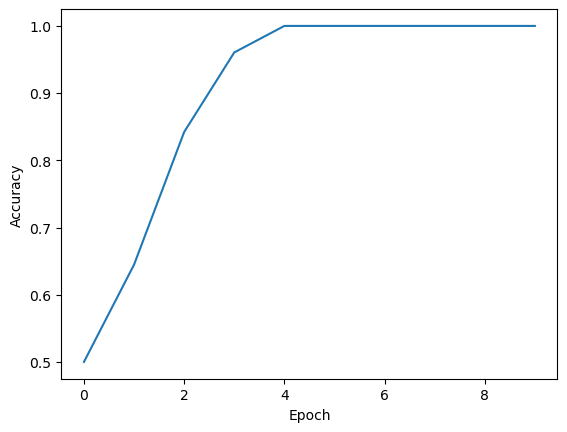

In [36]:
#Plot Training accuracy vs epoch

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [37]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

1/1 [==============================] - 0s 85ms/step - loss: 0.1225 - accuracy: 0.9500
Test loss: 0.12246696650981903
Test accuracy: 0.949999988079071


<font size=4>Results, Discussion and Predictions of the models</font>

In [38]:
print('Train Result:')
print("Train loss:", train_loss)
print("Train accuracy:", train_accuracy)
print(" ")
print('Test Result:')
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Train Result:
Train loss: 0.014610317535698414
Train accuracy: 1.0
 
Test Result:
Test loss: 0.12246696650981903
Test accuracy: 0.949999988079071


From the result we can see that the train data have a small value of loss and almost 100% accuracy (it is show 1.0 as it been round off) compare to test value which have more loss (0.12) and a lower accuracy compare to train which is 95% accurate. 

The possible result is the model might been overfitting during training using train data. When we run this model with new test data, it cannot predict 100% correctly. 

In order to improve our ANN model, there are 3 hyperparameters that we can tune with:

1. The numbers of nodes and number of hidden layers. 

2. The number of epochs.

3. The number of batch sizes.

In [39]:
# Now, let's make predictions on new inputs
new_inputs = ["The quality of customer service was exceptionally poor"]

# Preprocess the new inputs
new_inputs = [preprocess_text(text) for text in new_inputs]

# Vectorize the new inputs using the same vectorizer
new_inputs_vectorized = vectorizer.transform(new_inputs)

# Convert the sparse matrix to a dense array
new_inputs_vectorized = new_inputs_vectorized.toarray()

# Make predictions
predictions = model.predict(new_inputs_vectorized)

#index of large value
idx = np.argmax(predictions)

#print index
print('Prediction Sentiment: ', le.inverse_transform([idx]))

1/1 [==============================] - 0s 340ms/step
Prediction Sentiment:  ['Negative']
